In [1]:
import tensorflow as tf

C:\Users\Rahul\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(101)
tf.set_random_seed(101)

In [10]:
rand_a=np.random.uniform(0,100,(5,5))
rand_b=np.random.uniform(0,100,(5,1))

In [12]:
a=tf.placeholder(tf.float32)

In [13]:
b=tf.placeholder(tf.float32)

In [14]:
add_op=a+b

In [15]:
mul_op=a*b

In [23]:
with tf.Session() as sess:
    add_result=sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    mult_result=sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[167.49957  120.13432  125.94673  141.54968  122.26396 ]
 [143.47017  132.94684   92.454605  87.87726  147.44249 ]
 [ 38.702827  90.84965   87.36744   58.15581   96.58661 ]
 [ 32.108307  32.67841   92.54439  111.44165   38.34969 ]
 [ 85.07776  124.76966   73.95082  127.65762  106.28403 ]]


[[6768.1016  3544.0537  3939.6917  5001.75    3689.0134 ]
 [4762.5356  4213.693   2101.828   1863.0972  4969.7114 ]
 [ 149.12474  375.42468  360.31305  233.54427  400.3212 ]
 [ 217.54652  230.31317 1570.9315  1994.1104   357.3139 ]
 [1585.1073  3868.2053   945.07996 4034.3225  2804.9026 ]]


In [68]:
n_features=10
n_dense_neurons=3

In [69]:
x=tf.placeholder(tf.float32,(None,n_features))

In [70]:
W=tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b=tf.Variable(tf.ones([n_dense_neurons]))

In [71]:
xW=tf.matmul(x,W)

In [72]:
z=tf.add(xW,b)

In [73]:
a=tf.sigmoid(z)

In [74]:
init = tf.global_variables_initializer()

In [75]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [76]:
print(layer_out)

[[0.31444085 0.3607394  0.72085404]]


In [32]:
x_data=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [33]:
x_data

array([-1.13869902,  1.11146125,  1.13625093,  1.99175854,  3.47927521,
        5.38265995,  7.79942864,  9.12557016,  8.82339114,  9.88335803])

In [39]:
y_label=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

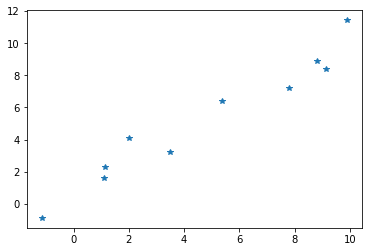

In [41]:
plt.plot(x_data,y_label,'*')

In [44]:
np.random.rand(2)


array([0.22765589, 0.04816889])

In [45]:
m=tf.Variable(0.44)
b=tf.Variable(0.87)

In [48]:
error=0

for x,y in zip(x_data,y_label): #zip gives a tuple
    
    y_hat=m*x+b
    
    error += (y-y_hat)**2

In [50]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [51]:
init=tf.global_variables_initializer()

In [59]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps=100
    
    for i in range(training_steps):
        
        sess.run(train)
    final_slope,final_intercept=sess.run([m,b])

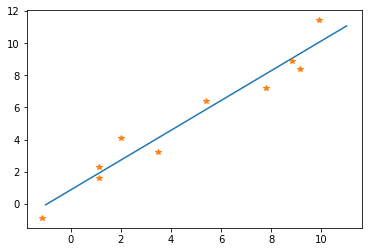

In [60]:
x_test=np.linspace(-1,11,10)

y_pred_plot=final_slope*x_test+final_intercept

plt.plot(x_test,y_pred_plot)
plt.plot(x_data,y_label,'*')